In [1]:
import pandas as pd
import numpy as np
import kinematics as kin
import matplotlib.pyplot as plt

# Classwork 5
The only function in the module "kinematics" that we wrote is the integration function. We figured it would be simpler to get the data from the .csv file in this notebook, rather than putting it into a module. 
As for our data, the example we chose to use is your suggestion, a helix. So, without further ado, here is a plot of just all three acceleration components:

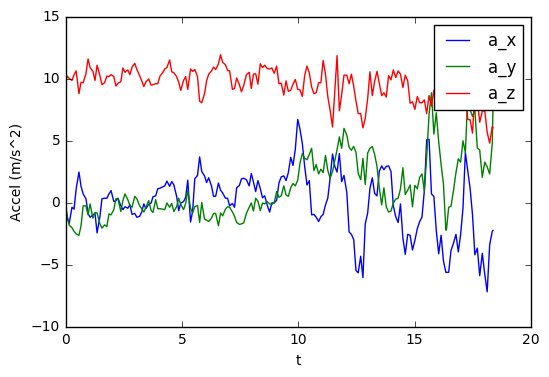

In [2]:
#getting acceleration values
df = pd.read_csv('accelerometer.csv')
a_x = df[' Acceleration X (g)']*9.81
a_y = df[' Acceleration Y (g)']*9.81
a_z = df[' Acceleration Z (g)']*9.81
t = df[' t']

#getting altitude values
dfAlt = pd.read_csv('barometer.csv')
height = dfAlt[' Pressure Altitude (m)']

plt.plot(t,a_x,t,a_y,t,a_z)
plt.legend(['a_x','a_y','a_z'])
plt.xlabel('t')
plt.ylabel('Accel (m/s^2)')
plt.show()

And now, making use of the integration function from our kinematics module, here are the plots of acceleration, velocity, position, and height as read by the barometer superimposed, one for each componenent:

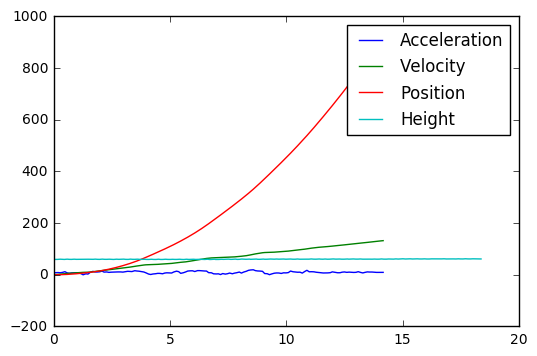

In [3]:
#getting all the data 
df = pd.read_csv('accelerometer1.csv')
dfAlt = pd.read_csv('barometer.csv')
height = dfAlt[' Pressure Altitude (m)']
time = dfAlt[' t']
t = df[' t']
a_t = df[' Acceleration Z (g)']*9.81

#integrating it
l = kin.integral(t, a_t)
l2 = kin.integral(t, l[1])
#plotting it
plt.plot(t,a_t,t,l[1],t,l2[1],time, height)
plt.legend(['Acceleration','Velocity','Position','Height'])
plt.show()

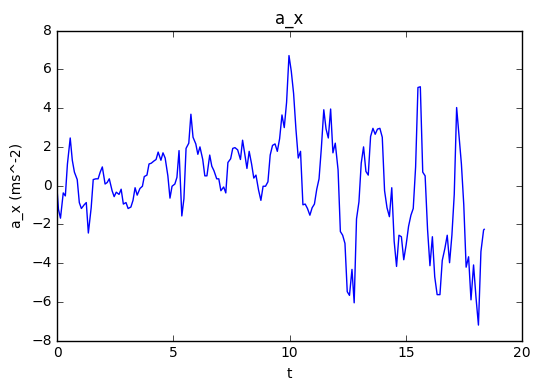

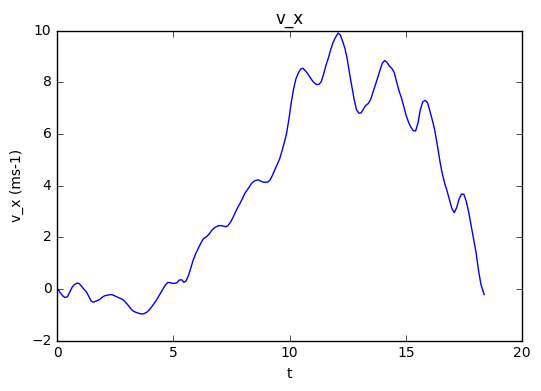

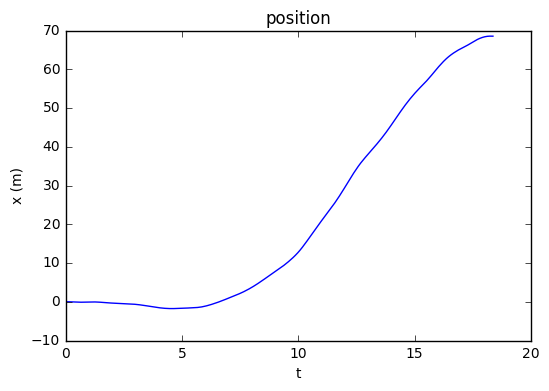

In [4]:
#getting all the data 
df = pd.read_csv('accelerometer.csv')
dfAlt = pd.read_csv('barometer.csv')
height = dfAlt[' Pressure Altitude (m)']
time = dfAlt[' t']
t = df[' t']
a_t = df[' Acceleration X (g)']*9.81

#calculating
l = kin.integral(t, a_t)
l2 = kin.integral(t, l[1])

#plotting
plt.plot(t,a_t)
plt.xlabel('t')
plt.ylabel('a_x (ms^-2)')
plt.title('a_x')
plt.show()

plt.plot(t,l[1])
plt.xlabel('t')
plt.ylabel('v_x (ms-1)')
plt.title('v_x')
plt.show()

plt.plot(t,l2[1])
plt.xlabel('t')
plt.ylabel('x (m)')
plt.title('position')
plt.show()

Clearly the integration function is not perfect, as I really don't think Sakthi managed to throw the lab 60 or so meters. However, I'm not sure where the huge error is coming from, as I think the implementation of the trapezoid rule is correct. Either way, here is a plot of our $z$ data vs the barometer's data:

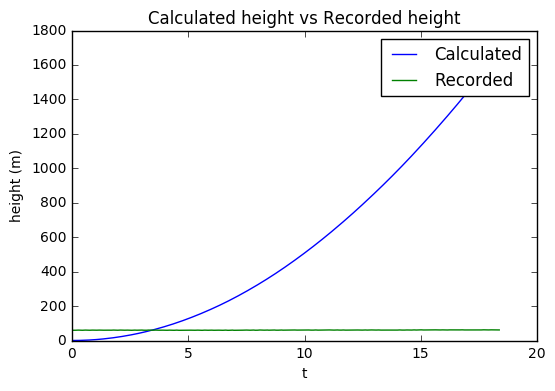

In [5]:
#getting all the data 
df = pd.read_csv('accelerometer.csv')
dfAlt = pd.read_csv('barometer.csv')
height = dfAlt[' Pressure Altitude (m)']
time = dfAlt[' t']
t = df[' t']
a_t = df[' Acceleration Z (g)']*9.81

#calculating
l = kin.integral(t, a_t)
l2 = kin.integral(t, l[1])

plt.plot(t,l2[1],time,height)
plt.xlabel('t')
plt.ylabel('height (m)')
plt.title('Calculated height vs Recorded height')
plt.legend(['Calculated','Recorded'])
plt.show()